# Principal Component Analysis(PCA)

In [5]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data
y = mnist.target

In [28]:
X_train = X[0:10000]
y_train = y[0:10000]

In [29]:
X_train.shape

(10000, 784)

In [30]:

y_train = np.asarray(list(map(int, y_train)))

In [31]:
y_train

array([5, 0, 4, ..., 6, 9, 7])

In [32]:


import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [33]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [34]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.3754708766937256 seconds


In [36]:
pca_df = pd.DataFrame(columns = ['pca1','pca2')

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]


print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.10200027 0.0721544 ]


In [37]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

In [38]:
top_two_comp.values

array([[ 108.2259429 , -336.90127535],
       [1026.54559406, -381.94132366],
       [ -41.72670053,  405.25450384],
       ...,
       [-485.47849946, -337.33638885],
       [-364.62761699,  475.5135624 ],
       [-337.37170538,  591.89318796]])

(<Figure size 576x576 with 1 Axes>,
 [Text(1066.7998032922505, -248.02808826075884, '0'),
  Text(-898.9725444165709, -397.64061041191337, '1'),
  Text(41.987608016481154, -264.925637486818, '2'),
  Text(25.243209383745018, -515.5844320469059, '3'),
  Text(-48.51407043833359, 590.0570006581283, '4'),
  Text(20.620846517307335, -135.19812620116915, '5'),
  Text(176.36653398429002, -20.74695946748344, '6'),
  Text(-256.75401627783776, 632.0481890559407, '7'),
  Text(-74.21194757817413, -235.8744956927901, '8'),
  Text(-175.73886528589824, 590.915604413997, '9')])

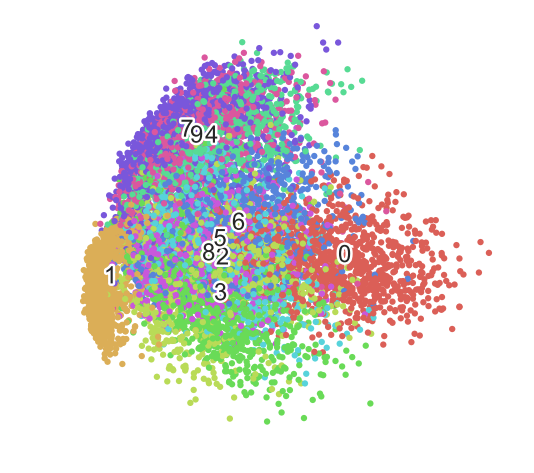

In [39]:


fashion_scatter(top_two_comp.values, y_train) # Visualizing the PCA output

In [40]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(X_train)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 270.20462369918823 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-13.265895, 68.27912, '0'),
  Text(48.791714, -40.96693, '1'),
  Text(48.287205, 3.4701757, '2'),
  Text(1.9598621, 19.861435, '3'),
  Text(-48.86889, -24.633121, '4'),
  Text(-39.235638, 30.613369, '5'),
  Text(36.728264, 55.03771, '6'),
  Text(-21.387892, -65.48834, '7'),
  Text(5.3644996, -10.483355, '8'),
  Text(-37.07156, -25.663002, '9')])

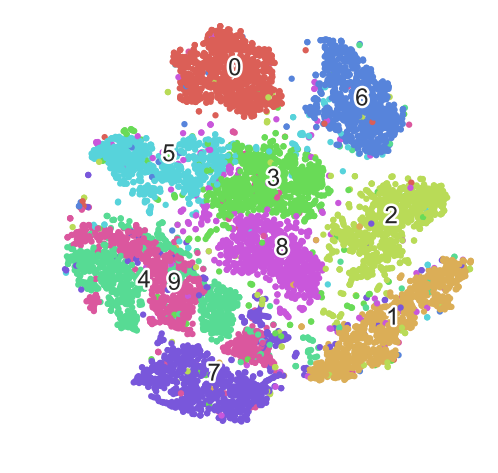

In [42]:
fashion_scatter(fashion_tsne, y_train)

In [44]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X_train)

print ('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 0.6746110916137695 seconds
Cumulative variance explained by 50 principal components: 0.828242295301502


In [45]:
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 151.39822149276733 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-7.227886, 67.61539, '0'),
  Text(32.986683, -54.813656, '1'),
  Text(52.722332, -5.747325, '2'),
  Text(13.169891, 17.470608, '3'),
  Text(-54.11158, -14.480034, '4'),
  Text(-29.166967, 33.08466, '5'),
  Text(45.459717, 48.46932, '6'),
  Text(-37.847267, -58.18075, '7'),
  Text(4.4198494, -11.962982, '8'),
  Text(-39.941856, -11.3254, '9')])

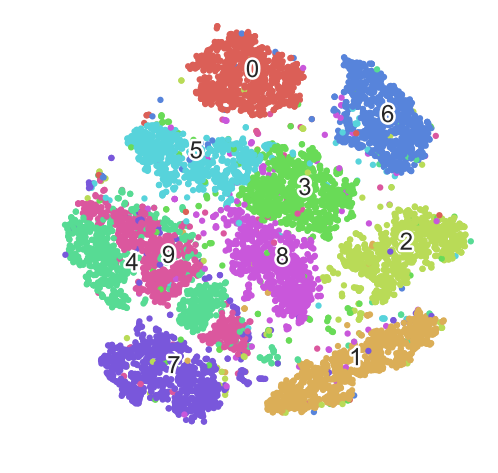

In [47]:
fashion_scatter(fashion_pca_tsne, y_train)